In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

youtube_df = pd.read_csv('../../datasets/processed/youtube_comments_processed.csv')

youtube_df.head()

,video_id,text,author,likes,date,time,year,met_gala_year
0,iWS3oVeyjL4,upppp ice ate monocl,@HippiesHealingApothecary,0,2025-05-15,12:00:00,2025,2025
1,iWS3oVeyjL4,spoken conect scream well deep perhap everi qu...,@lotsofinterests,0,2025-05-15,06:00:00,2025,2025
2,iWS3oVeyjL4,feel dear cours harri hair assign wouldv becom...,@SeventhGate008,0,2025-05-15,03:00:00,2025,2025
3,iWS3oVeyjL4,photographi excel hat kojo highlight der remin...,@shortourt14,0,2025-05-15,01:00:00,2025,2025
4,iWS3oVeyjL4,american anyway histori narrat comedi unlik af...,@KindnessKillsNONDO,0,2025-05-14,17:00:00,2025,2025


In [2]:
# Check NaN values by column initially
print("Initial NaN counts by column:")
nan_by_column = youtube_df.isna().sum()
print(nan_by_column)

# Method 1: Use inplace=True (modifies the original DataFrame)
print("\nDropping rows with NaN in 'text' column...")
youtube_df.dropna(subset=['text'], inplace=True)

print("\nDropping rows with NaN in 'author' column...")
youtube_df.dropna(subset=['author'], inplace=True)

# Check NaN values after dropping
print("\nNaN counts after dropping rows:")
nan_by_column = youtube_df.isna().sum()
print(nan_by_column)

# Print the shape of DataFrame before and after to confirm rows were dropped
print(f"\nFinal DataFrame shape: {youtube_df.shape}")

Initial NaN counts by column:
video_id            0
text             2281
author             17
likes               0
date                0
time                0
year                0
met_gala_year       0
dtype: int64

Dropping rows with NaN in 'text' column...

Dropping rows with NaN in 'author' column...

NaN counts after dropping rows:
video_id         0
text             0
author           0
likes            0
date             0
time             0
year             0
met_gala_year    0
dtype: int64

Final DataFrame shape: (69780, 8)


In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# start VADER sentiment analyser.
sia = SentimentIntensityAnalyzer()

modern_positive_slang = {
    'slay': 3.0,          # Excellent performance
    'fire': 3.0,          # Very good
    'lit': 2.5,           # Amazing
    'queen': 2.5,         # Term of endearment/praise
    'iconic': 2.7,        # Memorable/remarkable
    'goals': 2.5,         # Aspirational
    'stan': 3.0,          # Strong admiration
    'vibe': 1.5,          # Good feeling
    'periodt': 2.5,       # Emphasizes a point (usually positive)
    'glowing': 2.0,       # Looking great
    'obsessed': 2.5,      # Really like something
    'chef\'s kiss': 3.0,  # Perfect
    'serve': 2.5,         # Impressive display
    'ate': 3.0,           # Did extremely well
    'baddie': 2.5,        # Attractive and confident
    'snatched': 2.5,      # Looking good/perfect
    'yas': 2.5,           # Enthusiastic yes
    'slaps': 2.0,         # Very good
    'bop': 2.0,           # Catchy/good song
    'glow up': 2.5,       # Impressive improvement
    'goated': 3.0,        # Greatest of all time
    'wig': 2.5,           # So good it's shocking
    'flex': 1.5,          # Show off (in a good way)
    'lowkey': 0.5,        # Somewhat/subtly
    'highkey': 1.5,       # Obviously/very
    'drop': 1.0,          # Release something
}

# Negative terms with their intensity (between -1 and -4)
modern_negative_slang = {
    'basic': -1.5,        # Unoriginal/boring
    'mid': -2.0,          # Mediocre/disappointing
    'cringe': -2.5,       # Embarrassing
    'yikes': -2.0,        # Expression of dismay
    'boomer': -1.5,       # Out of touch (age-related)
    'karen': -2.5,        # Entitled/demanding
    'trash': -3.0,        # Very bad
    'flop': -2.5,         # Failure
    'cancelled': -2.5,    # Rejected/ostracized
    'sus': -1.5,          # Suspicious/questionable
    'drama': -1.5,        # Unnecessary conflict
    'ghost': -2.0,        # Ignore someone
    'toxic': -3.0,        # Harmful relationship/behavior
    'triggered': -1.5,    # Upset by something
    'gaslighting': -3.0,  # Psychological manipulation
    'problematic': -2.0,  # Having issues
    'fell off': -2.0,     # Declined in quality/popularity
    'fumbled': -2.0,      # Messed up an opportunity
    'cap': -1.5,          # Lying/not true
    'pressed': -1.5,      # Upset/bothered
    'brutal': -2.0,       # Harsh/severe
    'tea': -1.0,          # Gossip
    'shade': -1.5,        # Subtle disrespect
    'cancelled': -2.5,    # Socially rejected
    'fake': -2.0,         # Inauthentic
    'dead': -0.5,         # Extremely funny (can be positive in context)
}

# Update the VADER lexicon with our custom terms
sia.lexicon.update({**modern_positive_slang, **modern_negative_slang})

def compute_sentiment(l_tokens):
    
    return sia.polarity_scores(l_tokens)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/harrymarshall/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
sentiment_scores = []

for text in youtube_df['text']:
    sentiment = compute_sentiment(text)
    sentiment_scores.append(sentiment['compound'])

youtube_df['sentiment'] = sentiment_scores

In [5]:
youtube_df.head()

,video_id,text,author,likes,date,time,year,met_gala_year,sentiment
0,iWS3oVeyjL4,upppp ice ate monocl,@HippiesHealingApothecary,0,2025-05-15,12:00:00,2025,2025,0.6124
1,iWS3oVeyjL4,spoken conect scream well deep perhap everi qu...,@lotsofinterests,0,2025-05-15,06:00:00,2025,2025,0.8689
2,iWS3oVeyjL4,feel dear cours harri hair assign wouldv becom...,@SeventhGate008,0,2025-05-15,03:00:00,2025,2025,0.9274
3,iWS3oVeyjL4,photographi excel hat kojo highlight der remin...,@shortourt14,0,2025-05-15,01:00:00,2025,2025,0.6597
4,iWS3oVeyjL4,american anyway histori narrat comedi unlik af...,@KindnessKillsNONDO,0,2025-05-14,17:00:00,2025,2025,0.7845


In [6]:
# ========== PRINT AVERAGE SENTIMENT STATS ==========
# Print average sentiment by year
avg_by_year = youtube_df.groupby('met_gala_year')['sentiment'].mean().reset_index()
avg_by_year.columns = ['Met Gala Year', 'Average Sentiment']
print("\nAverage Sentiment by Met Gala Year:")
print(avg_by_year.to_string(index=False))

# Print average sentiment by video ID
avg_by_video = youtube_df.groupby('video_id')['sentiment'].mean().reset_index()
avg_by_video.columns = ['Video ID', 'Average Sentiment']
print("\nAverage Sentiment by Video ID:")
print(avg_by_video.to_string(index=False))


Average Sentiment by Met Gala Year:
 Met Gala Year  Average Sentiment
          2021           0.100977
          2022           0.108020
          2023           0.089603
          2024           0.108640
          2025           0.161203

Average Sentiment by Video ID:
   Video ID  Average Sentiment
Ar9NFhmSnrk           0.162893
AyFzKATCiv0           0.200681
BbAgK_jGRfE           0.084575
E_WcvAiKQfI           0.104425
ItZ4SlxpOiI           0.153040
JGVq7J5_sTk           0.079922
LHCTW4pckDo           0.064578
NW2oiPiqByk           0.155504
P71sr0kZY7o           0.125748
PbRZcvVnF0w           0.071082
RqYRTmpBu0k           0.041410
XUIB4oWw37I           0.183872
YMPPo7APaoA           0.139984
ZMrgtotgThk           0.095576
cpFc1RPOF7s           0.147437
iWS3oVeyjL4           0.144920
jlR-T42I18E           0.146639
lyJqXb8Nj-I           0.138224
mrFfGptVzrI           0.088963
qEvQa6xayYE           0.136272
qKYhgn1TiV4           0.162550
urdBX1l0I6I           0.087668


/var/folders/58/0gr13fcd0rj8t5cp8_mhf2m00000gn/T/ipykernel_53712/1240413970.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='met_gala_year', y='sentiment', data=youtube_df, palette='viridis')


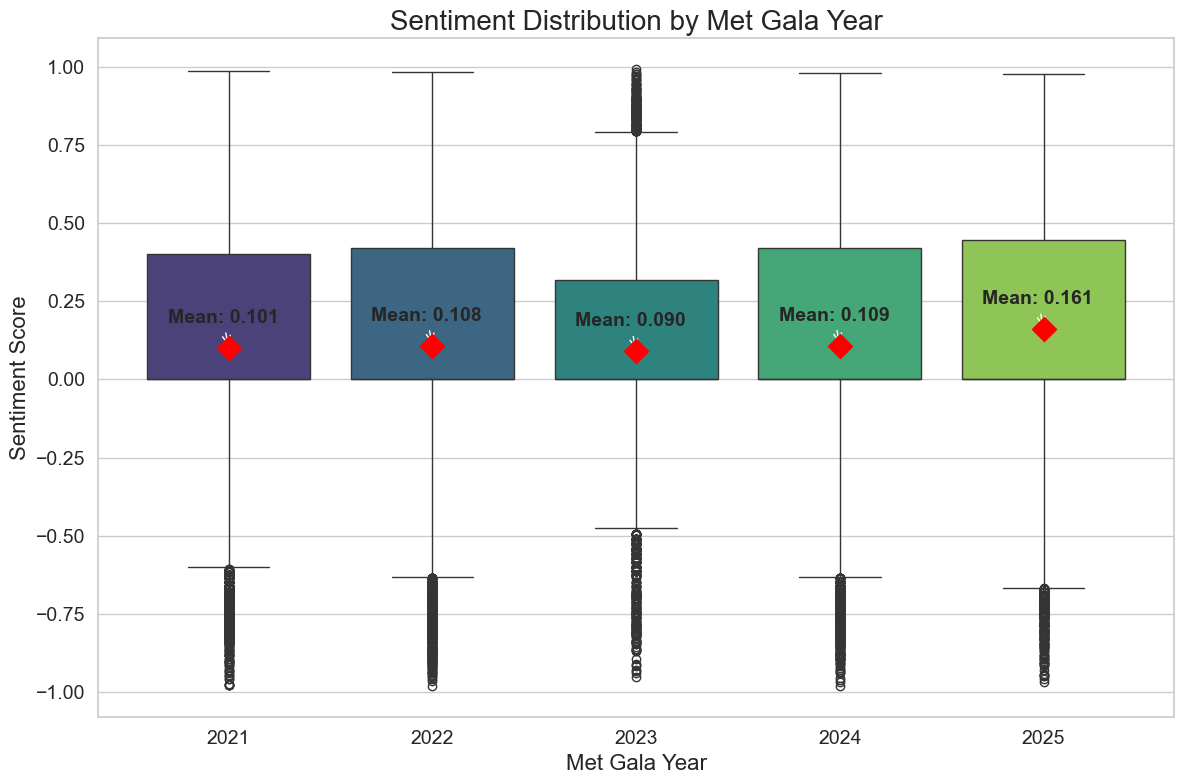

/var/folders/58/0gr13fcd0rj8t5cp8_mhf2m00000gn/T/ipykernel_53712/1240413970.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='video_id', y='sentiment', data=youtube_df, palette='muted')


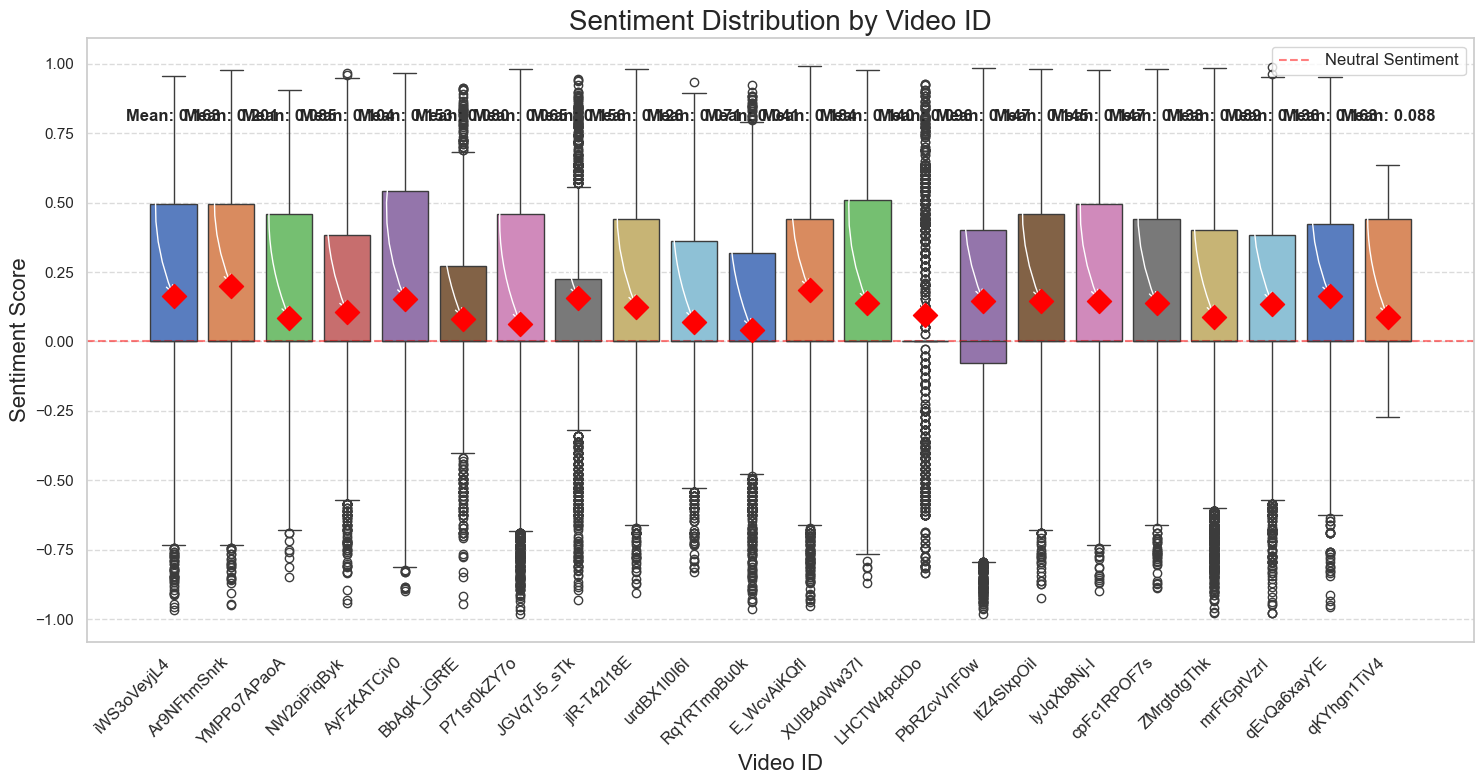


Average Sentiment by Met Gala Year:
 Met Gala Year  Average Sentiment
          2021           0.100977
          2022           0.108020
          2023           0.089603
          2024           0.108640
          2025           0.161203

Average Sentiment by Video ID:
   Video ID  Average Sentiment
Ar9NFhmSnrk           0.162893
AyFzKATCiv0           0.200681
BbAgK_jGRfE           0.084575
E_WcvAiKQfI           0.104425
ItZ4SlxpOiI           0.153040
JGVq7J5_sTk           0.079922
LHCTW4pckDo           0.064578
NW2oiPiqByk           0.155504
P71sr0kZY7o           0.125748
PbRZcvVnF0w           0.071082
RqYRTmpBu0k           0.041410
XUIB4oWw37I           0.183872
YMPPo7APaoA           0.139984
ZMrgtotgThk           0.095576
cpFc1RPOF7s           0.147437
iWS3oVeyjL4           0.144920
jlR-T42I18E           0.146639
lyJqXb8Nj-I           0.138224
mrFfGptVzrI           0.088963
qEvQa6xayYE           0.136272
qKYhgn1TiV4           0.162550
urdBX1l0I6I           0.087668

Sentiment Var

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming youtube_df is already loaded and contains your data

# Set the style for better visualization
sns.set(style="whitegrid")

# FIRST PLOT: Sentiment by Met Gala Year (full screen)
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='met_gala_year', y='sentiment', data=youtube_df, palette='viridis')
plt.title('Sentiment Distribution by Met Gala Year', fontsize=20)
plt.xlabel('Met Gala Year', fontsize=16)
plt.ylabel('Sentiment Score', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add mean values as red diamonds
year_means = youtube_df.groupby('met_gala_year')['sentiment'].mean()
for i, mean_val in enumerate(year_means):
    plt.scatter(i, mean_val, color='red', marker='D', s=150, zorder=10)
    plt.annotate(f'Mean: {mean_val:.3f}', 
                 xy=(i, mean_val),
                 xytext=(i-0.3, mean_val+0.08),
                 fontsize=14,
                 fontweight='bold',
                 arrowprops=dict(arrowstyle='->'))

# Adjust layout and save the first figure
plt.tight_layout()
plt.savefig('sentiment_by_year_boxplot.png', dpi=300)
plt.show()

# SECOND PLOT: Sentiment by Video ID (full screen)
plt.figure(figsize=(15, 8))  # Make it wider for more video IDs
ax = sns.boxplot(x='video_id', y='sentiment', data=youtube_df, palette='muted')
plt.title('Sentiment Distribution by Video ID', fontsize=20)
plt.xlabel('Video ID', fontsize=16)
plt.ylabel('Sentiment Score', fontsize=16)

# Improve the readability of video IDs
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add a grid for easier reading across the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add mean values as red diamonds
video_means = youtube_df.groupby('video_id')['sentiment'].mean()
for i, mean_val in enumerate(video_means):
    plt.scatter(i, mean_val, color='red', marker='D', s=150, zorder=10)
    
    # Position the annotation based on available space
    if len(video_means) > 5:
        # For many video IDs, position annotations more carefully
        plt.annotate(f'Mean: {mean_val:.3f}', 
                     xy=(i, mean_val),
                     xytext=(i, max(mean_val + 0.1, youtube_df['sentiment'].max() * 0.8)),
                     fontsize=12,
                     fontweight='bold',
                     ha='center',
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))
    else:
        # For fewer video IDs, use simpler annotations
        plt.annotate(f'Mean: {mean_val:.3f}', 
                     xy=(i, mean_val),
                     xytext=(i-0.3, mean_val+0.08),
                     fontsize=14,
                     fontweight='bold',
                     arrowprops=dict(arrowstyle='->'))

# Add a horizontal line at sentiment = 0 for reference
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Neutral Sentiment')
plt.legend(fontsize=12)

# Adjust layout and save the second figure
plt.tight_layout()
plt.savefig('sentiment_by_video_boxplot.png', dpi=300)
plt.show()

# Calculate and print average sentiment statistics
# Print average sentiment by year
avg_by_year = youtube_df.groupby('met_gala_year')['sentiment'].mean().reset_index()
avg_by_year.columns = ['Met Gala Year', 'Average Sentiment']
print("\nAverage Sentiment by Met Gala Year:")
print(avg_by_year.to_string(index=False))

# Print average sentiment by video ID
avg_by_video = youtube_df.groupby('video_id')['sentiment'].mean().reset_index()
avg_by_video.columns = ['Video ID', 'Average Sentiment']
print("\nAverage Sentiment by Video ID:")
print(avg_by_video.to_string(index=False))

# Also calculate standard deviation to understand variability
std_by_year = youtube_df.groupby('met_gala_year')['sentiment'].std().reset_index()
std_by_year.columns = ['Met Gala Year', 'Sentiment Std Dev']
print("\nSentiment Variability by Met Gala Year:")
print(std_by_year.to_string(index=False))

std_by_video = youtube_df.groupby('video_id')['sentiment'].std().reset_index()
std_by_video.columns = ['Video ID', 'Sentiment Std Dev']
print("\nSentiment Variability by Video ID:")
print(std_by_video.to_string(index=False))

# Display the plot
plt.show()

Starting topic modeling on YouTube comments by Met Gala year...
Processing 69780 total comments...
Found 5 unique Met Gala years: [2021, 2022, 2023, 2024, 2025]

Processing Met Gala 2021
Processing 13370 comments for 2021...
Creating document-term matrix...
Document-term matrix shape: (13370, 1000)
Fitting LDA model with 4 topics...

Topics found for Met Gala 2021:
Topic #1: met, gala, theme, outfit, year, dress, dont, feel, lil, way
Topic #2: love, billi, best, talk, stun, outfit, luke, amaz, alway, eilish
Topic #3: american, theme, america, dress, refer, fashion, beauti, independ, referenc, mean
Topic #4: kim, dress, lol, wait, marilyn, monro, liter, wear, make, russel

Most Common Topics for 2021:
dress: 10497
theme: 8387
outfit: 7658
met: 4785
gala: 4785
year: 4785
dont: 4785
feel: 4785
lil: 4785
way: 4785

Processing Met Gala 2022
Processing 13220 comments for 2022...
Creating document-term matrix...
Document-term matrix shape: (13220, 1000)
Fitting LDA model with 4 topics...

Top

<Figure size 1500x800 with 0 Axes>

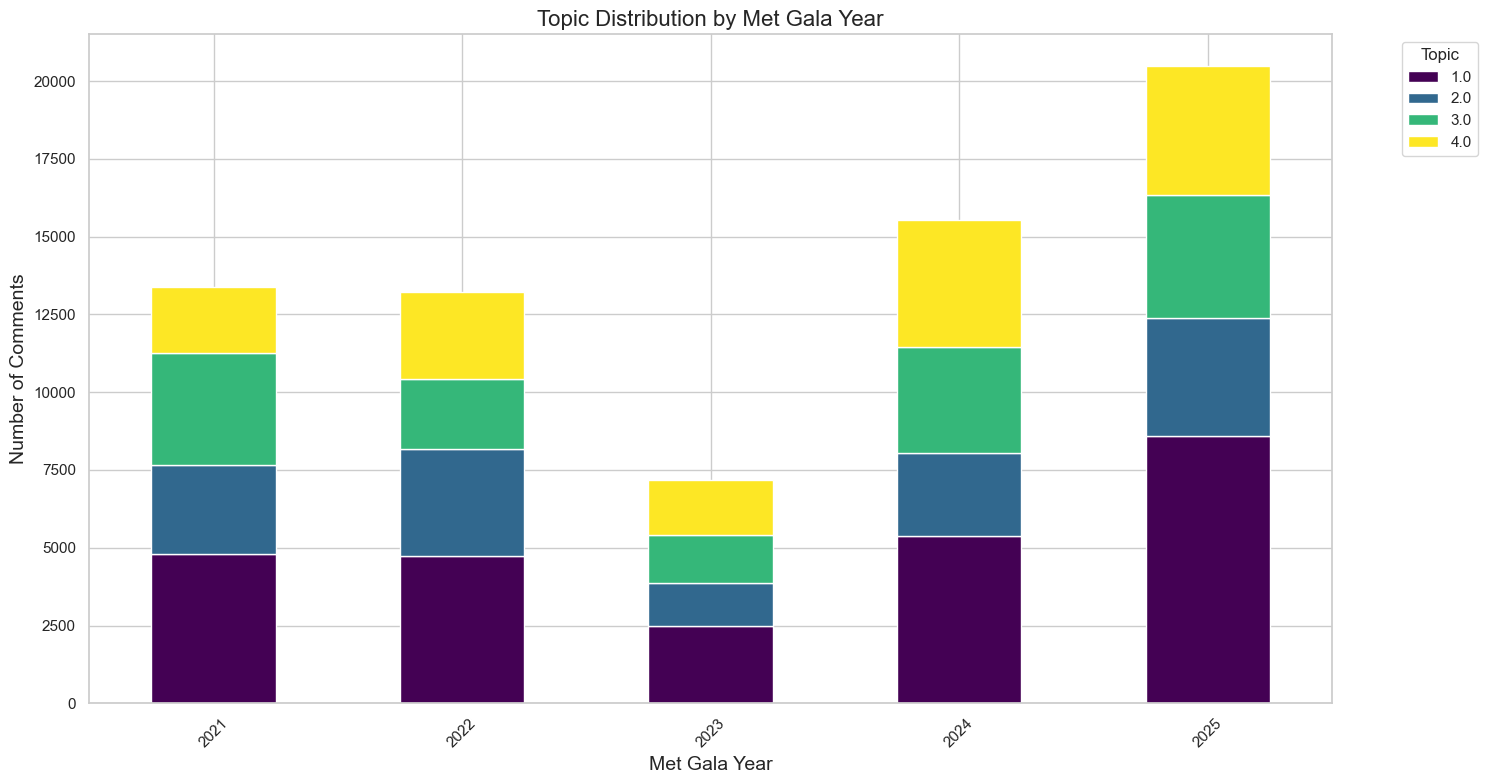

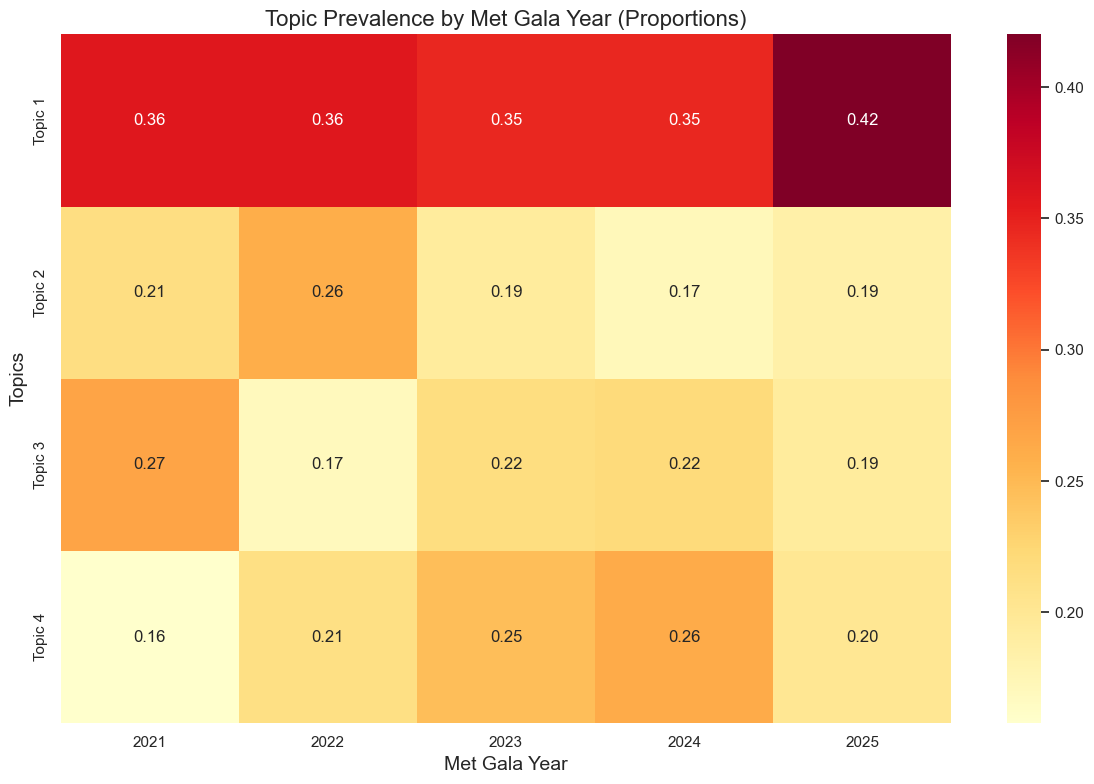


Analyzing sentiment by topic and year...


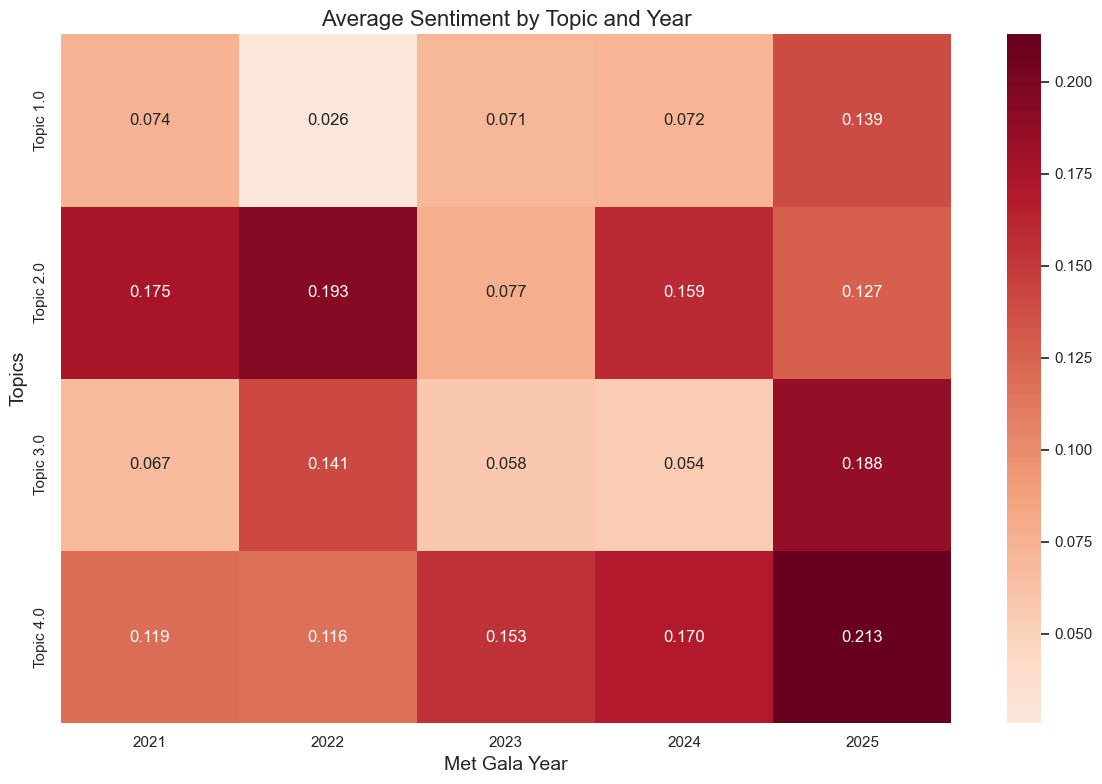


Saving results...

SUMMARY REPORT
Total comments analyzed: 69780
Years covered: [2021, 2022, 2023, 2024, 2025]
Topics per year: 4

Met Gala 2021 - Top 3 Topic Keywords:
  Topic 1: met, gala, theme, outfit, year
  Topic 2: love, billi, best, talk, stun
  Topic 3: american, theme, america, dress, refer

Met Gala 2022 - Top 3 Topic Keywords:
  Topic 1: dress, kim, billi, marilyn, wear
  Topic 2: blake, love, met, theme, gala
  Topic 3: emma, love, need, end, jack

Met Gala 2023 - Top 3 Topic Keywords:
  Topic 1: karl, theme, fashion, year, lol
  Topic 2: jimin, wait, rihanna, nice, dua
  Topic 3: dress, rosé, carpet, amaz, beauti

Met Gala 2024 - Top 3 Topic Keywords:
  Topic 1: dress, beauti, kendal, stun, kim
  Topic 2: met, gala, best, alia, lol
  Topic 3: kid, theme, stray, fashion, year

Met Gala 2025 - Top 3 Topic Keywords:
  Topic 1: lisa, love, met, gala, theme
  Topic 2: suit, come, way, favorit, els
  Topic 3: thank, amaz, way, absolut, explain

Sentiment Analysis Summary:
  20

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

# Assuming youtube_df is your existing DataFrame with already preprocessed text
print("Starting topic modeling on YouTube comments by Met Gala year...")
print(f"Processing {len(youtube_df)} total comments...")

# Get unique Met Gala years
unique_years = youtube_df['met_gala_year'].unique()
print(f"Found {len(unique_years)} unique Met Gala years: {sorted(unique_years)}")

# Dictionary to store results for each year
yearly_results = {}
all_topic_distributions = []

# Set the number of topics for LDA
num_topics = 4

# Function to print top words for each topic
def print_top_words(model, feature_names, n_top_words=10):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_terms = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(topic_terms)
        print(f"Topic #{topic_idx+1}: {', '.join(topic_terms)}")
    return topics

# Process each year separately
for year in sorted(unique_years):
    print(f"\n{'='*50}")
    print(f"Processing Met Gala {year}")
    print(f"{'='*50}")
    
    # Filter data for this year
    year_df = youtube_df[youtube_df['met_gala_year'] == year].copy()
    print(f"Processing {len(year_df)} comments for {year}...")
    
    # Skip if too few comments for meaningful analysis
    if len(year_df) < 10:
        print(f"Skipping {year} - too few comments ({len(year_df)})")
        continue
    
    # Create document-term matrix for this year
    print("Creating document-term matrix...")
    vectorizer = CountVectorizer(
        max_df=0.95,         # Ignore terms that appear in more than 95% of documents
        min_df=2,            # Ignore terms that appear in fewer than 2 documents
        max_features=1000,   # Limit to 1000 features for efficiency
        stop_words='english' # Additional stopword filtering
    )
    
    # Use the text column directly since it's already preprocessed
    doc_term_matrix = vectorizer.fit_transform(year_df['text'])
    feature_names = vectorizer.get_feature_names_out()
    print(f"Document-term matrix shape: {doc_term_matrix.shape}")
    
    # Create and fit the LDA model
    print(f"Fitting LDA model with {num_topics} topics...")
    lda_model = LatentDirichletAllocation(
        n_components=num_topics,
        max_iter=10,
        learning_method='online',
        random_state=42,
        batch_size=128,
        learning_decay=0.7
    )
    
    # Fit the model to the document-term matrix
    lda_model.fit(doc_term_matrix)
    
    # Print top words for each topic
    print(f"\nTopics found for Met Gala {year}:")
    all_topics_list = print_top_words(lda_model, feature_names)
    
    # Get topic distribution for each document
    topic_distributions = lda_model.transform(doc_term_matrix)
    
    # Create a dictionary to store document IDs for this year
    submission_ids = year_df.index.tolist()
    
    # Assign the most probable topic to each submission
    submission_topics = {}
    all_topics = set()
    
    for i, submission_id in enumerate(submission_ids):
        # Get the most probable topic for this document
        dominant_topic_idx = np.argmax(topic_distributions[i])
        # Get the top terms for this topic
        top_terms = all_topics_list[dominant_topic_idx]
        # Store as the topic for this submission
        submission_topics[submission_id] = top_terms
        # Add top terms to overall set of topics
        all_topics.update(top_terms)
    
    # Add dominant topic index to the year DataFrame
    dominant_topics = [np.argmax(dist) + 1 for dist in topic_distributions]
    year_df['dominant_topic'] = dominant_topics
    
    # Count the frequency of topics across all submissions for this year
    topic_counts = {}
    for topics in submission_topics.values():
        for topic in topics:
            if topic in topic_counts:
                topic_counts[topic] += 1
            else:
                topic_counts[topic] = 1
    
    # Print the most common topics for this year
    print(f"\nMost Common Topics for {year}:")
    for topic, count in sorted(topic_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{topic}: {count}")
    
    # Store results for this year
    yearly_results[year] = {
        'dataframe': year_df,
        'topics_list': all_topics_list,
        'topic_counts': topic_counts,
        'lda_model': lda_model,
        'vectorizer': vectorizer,
        'topic_distributions': topic_distributions
    }
    
    # Add year info to topic distributions for overall analysis
    year_topic_dist = pd.DataFrame(topic_distributions)
    year_topic_dist['year'] = year
    year_topic_dist['dominant_topic'] = dominant_topics
    all_topic_distributions.append(year_topic_dist)

# Combine all years back into the original dataframe
print(f"\n{'='*50}")
print("Combining results...")
print(f"{'='*50}")

combined_df = pd.concat([yearly_results[year]['dataframe'] for year in yearly_results.keys()], ignore_index=False)
combined_df = combined_df.sort_index()

# Update the original dataframe
youtube_df.loc[combined_df.index, 'dominant_topic'] = combined_df['dominant_topic']

# Create visualizations
print("\nCreating visualizations...")

# 1. Topic distribution by year
plt.figure(figsize=(15, 8))
topic_year_counts = youtube_df.groupby(['met_gala_year', 'dominant_topic']).size().unstack(fill_value=0)

# Create stacked bar chart
topic_year_counts.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')
plt.title('Topic Distribution by Met Gala Year', fontsize=16)
plt.xlabel('Met Gala Year', fontsize=14)
plt.ylabel('Number of Comments', fontsize=14)
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('topic_distribution_by_year.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Heatmap of topic prevalence by year
plt.figure(figsize=(12, 8))
topic_year_proportions = topic_year_counts.div(topic_year_counts.sum(axis=1), axis=0)
sns.heatmap(topic_year_proportions.T, annot=True, fmt='.2f', cmap='YlOrRd', 
            xticklabels=True, yticklabels=[f'Topic {i}' for i in range(1, num_topics+1)])
plt.title('Topic Prevalence by Met Gala Year (Proportions)', fontsize=16)
plt.xlabel('Met Gala Year', fontsize=14)
plt.ylabel('Topics', fontsize=14)
plt.tight_layout()
plt.savefig('topic_heatmap_by_year.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Sentiment analysis by topic and year (if sentiment column exists)
if 'sentiment' in youtube_df.columns:
    print("\nAnalyzing sentiment by topic and year...")
    
    # Calculate average sentiment for each topic by year
    sentiment_by_topic_year = youtube_df.groupby(['met_gala_year', 'dominant_topic'])['sentiment'].agg(['mean', 'count']).reset_index()
    sentiment_by_topic_year.columns = ['Year', 'Topic', 'Average_Sentiment', 'Count']
    
    # Pivot for heatmap
    sentiment_pivot = sentiment_by_topic_year.pivot(index='Topic', columns='Year', values='Average_Sentiment')
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(sentiment_pivot, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
                xticklabels=True, yticklabels=[f'Topic {i}' for i in sentiment_pivot.index])
    plt.title('Average Sentiment by Topic and Year', fontsize=16)
    plt.xlabel('Met Gala Year', fontsize=14)
    plt.ylabel('Topics', fontsize=14)
    plt.tight_layout()
    plt.savefig('sentiment_by_topic_year.png', dpi=300, bbox_inches='tight')
    plt.show()

# Save results
print("\nSaving results...")
youtube_df.to_csv('youtube_comments_with_topics_by_year.csv', index=False)

# Create a summary report
print(f"\n{'='*50}")
print("SUMMARY REPORT")
print(f"{'='*50}")

print(f"Total comments analyzed: {len(youtube_df)}")
print(f"Years covered: {sorted(unique_years)}")
print(f"Topics per year: {num_topics}")

# Print top topics for each year
for year in sorted(yearly_results.keys()):
    print(f"\nMet Gala {year} - Top 3 Topic Keywords:")
    topics = yearly_results[year]['topics_list']
    for i, topic_terms in enumerate(topics[:3], 1):
        print(f"  Topic {i}: {', '.join(topic_terms[:5])}")

if 'sentiment' in youtube_df.columns:
    print(f"\nSentiment Analysis Summary:")
    overall_sentiment = youtube_df.groupby(['met_gala_year'])['sentiment'].mean()
    for year, sentiment in overall_sentiment.items():
        print(f"  {year}: {sentiment:.3f}")

print(f"\nFiles saved:")
print(f"  - youtube_comments_with_topics_by_year.csv")
print(f"  - topic_distribution_by_year.png")
print(f"  - topic_heatmap_by_year.png")
if 'sentiment' in youtube_df.columns:
    print(f"  - sentiment_by_topic_year.png")

print(f"\nAnalysis complete!")

Creating word cloud for Met Gala 2021...


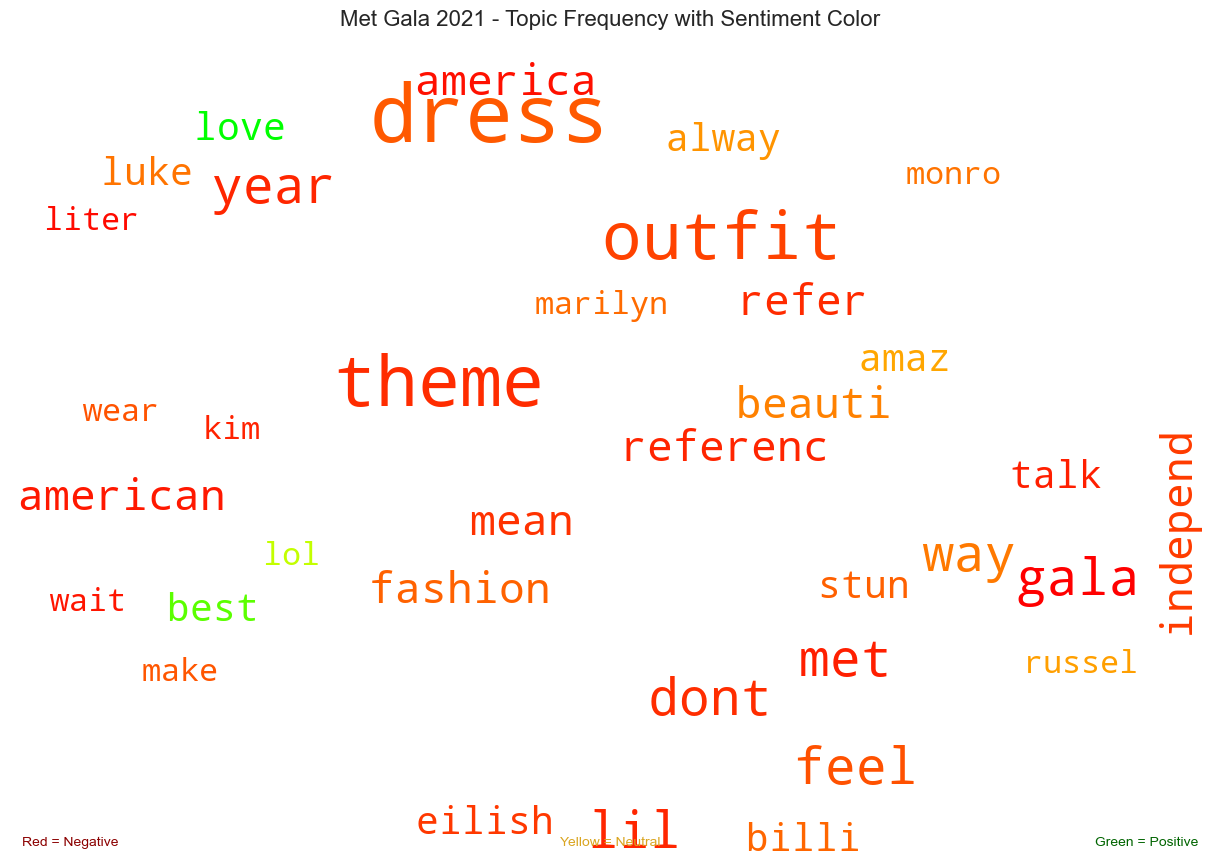

Word cloud saved as 'met_gala_2021_wordcloud.png'
Creating word cloud for Met Gala 2022...


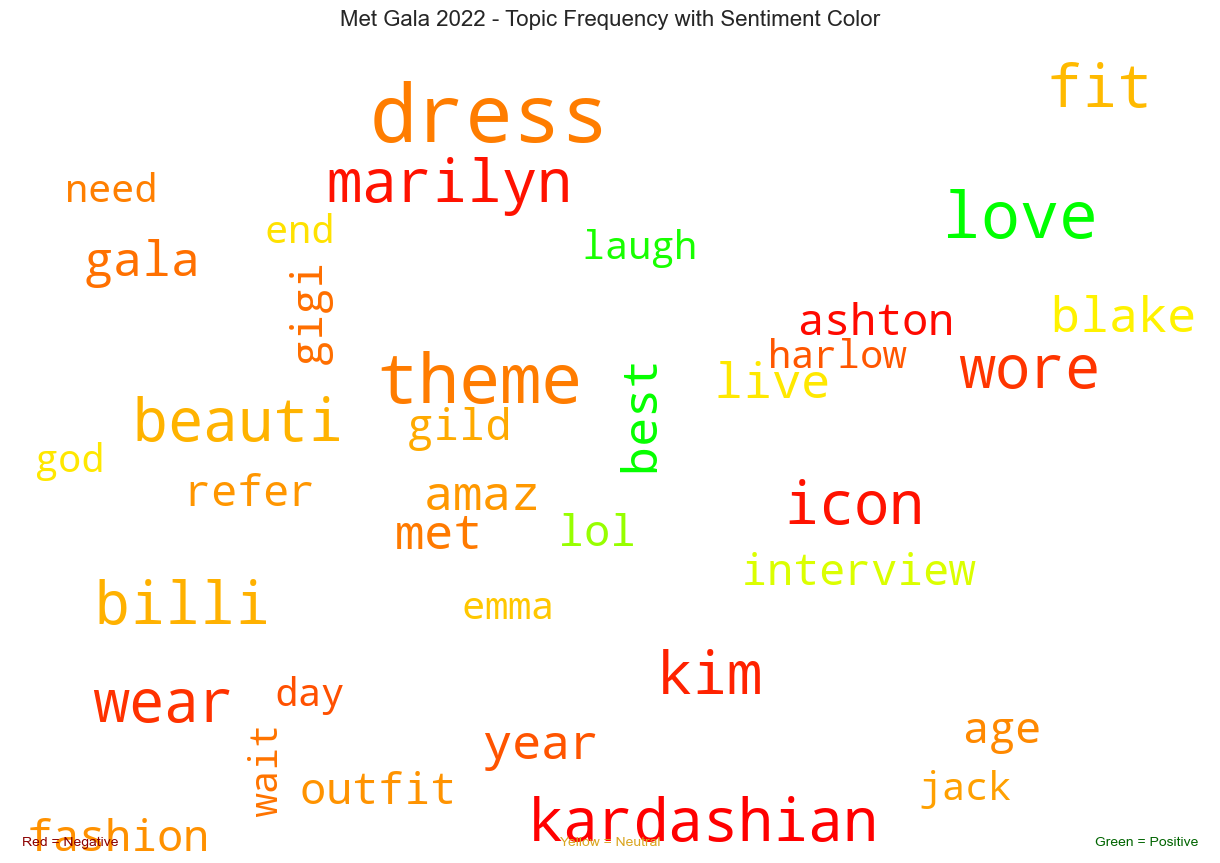

Word cloud saved as 'met_gala_2022_wordcloud.png'
Creating word cloud for Met Gala 2023...


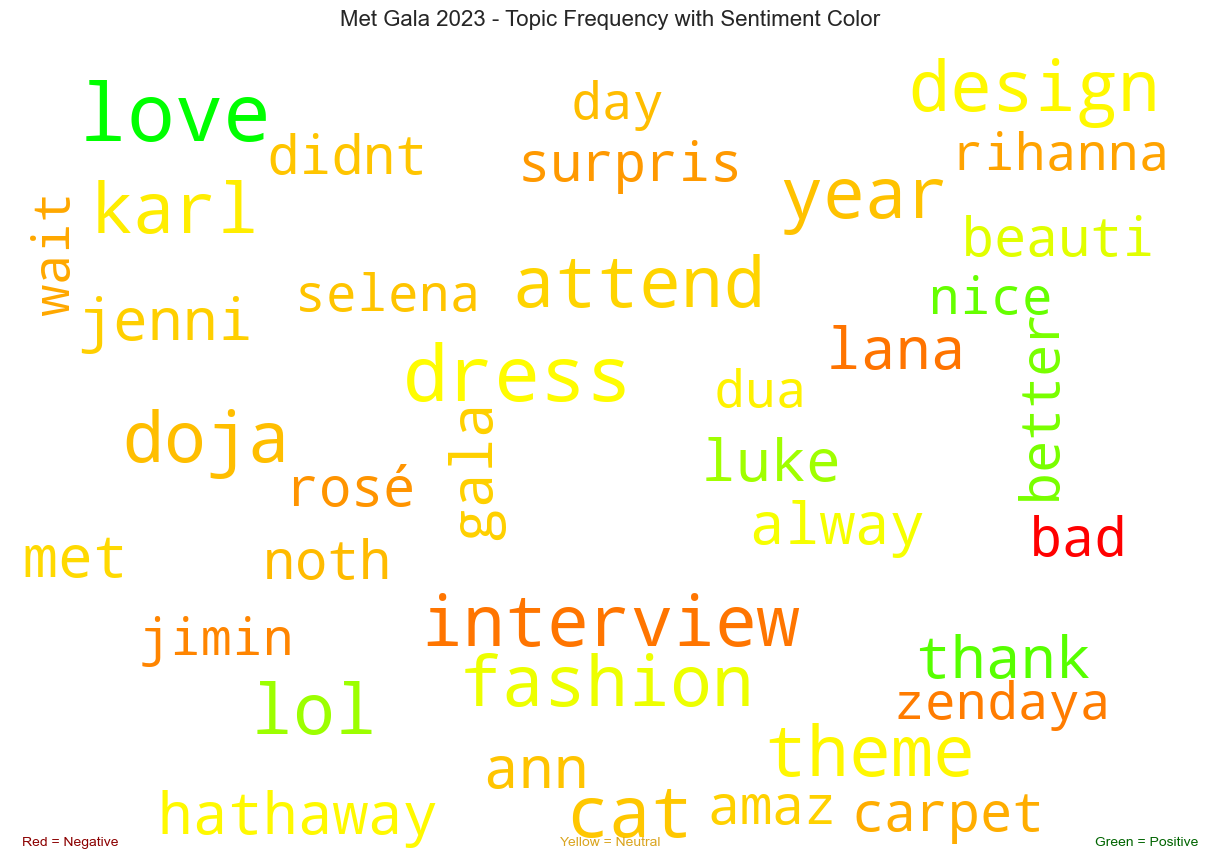

Word cloud saved as 'met_gala_2023_wordcloud.png'
Creating word cloud for Met Gala 2024...


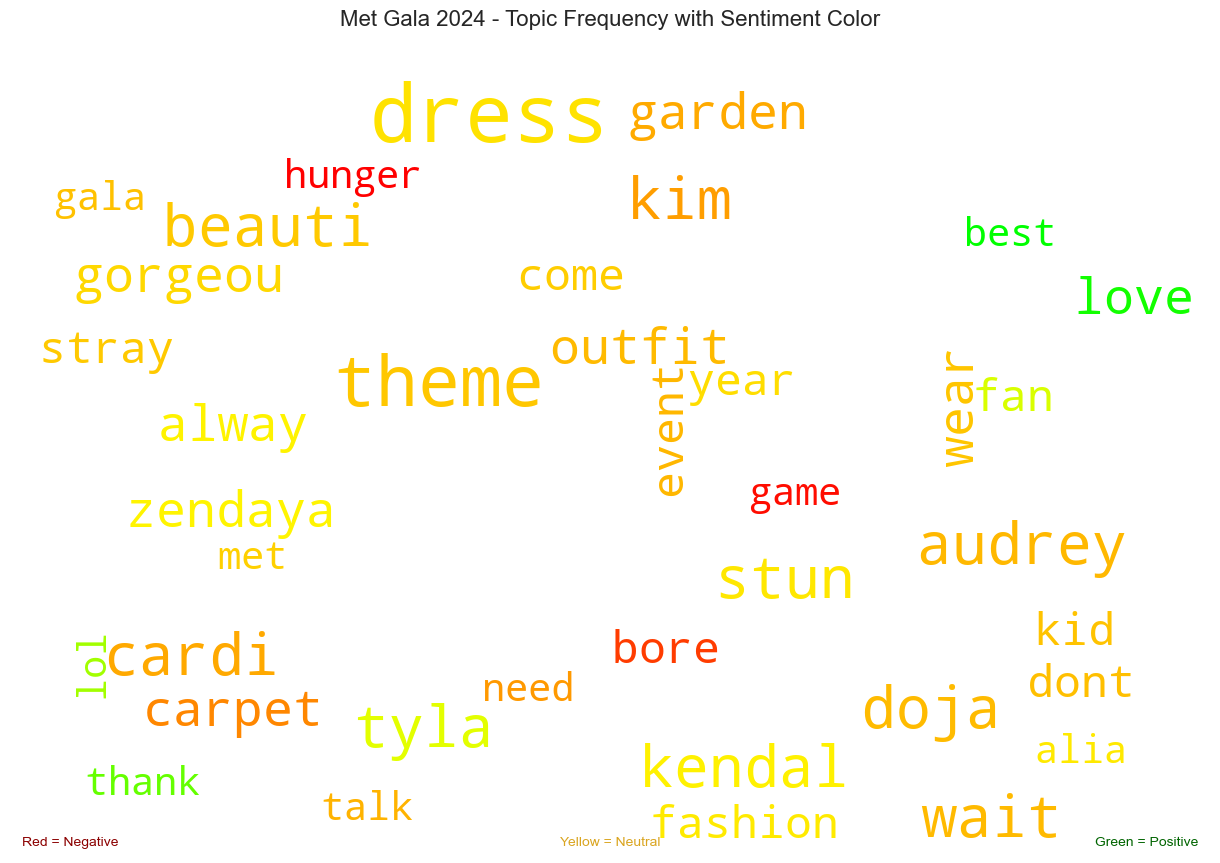

Word cloud saved as 'met_gala_2024_wordcloud.png'
Creating word cloud for Met Gala 2025...


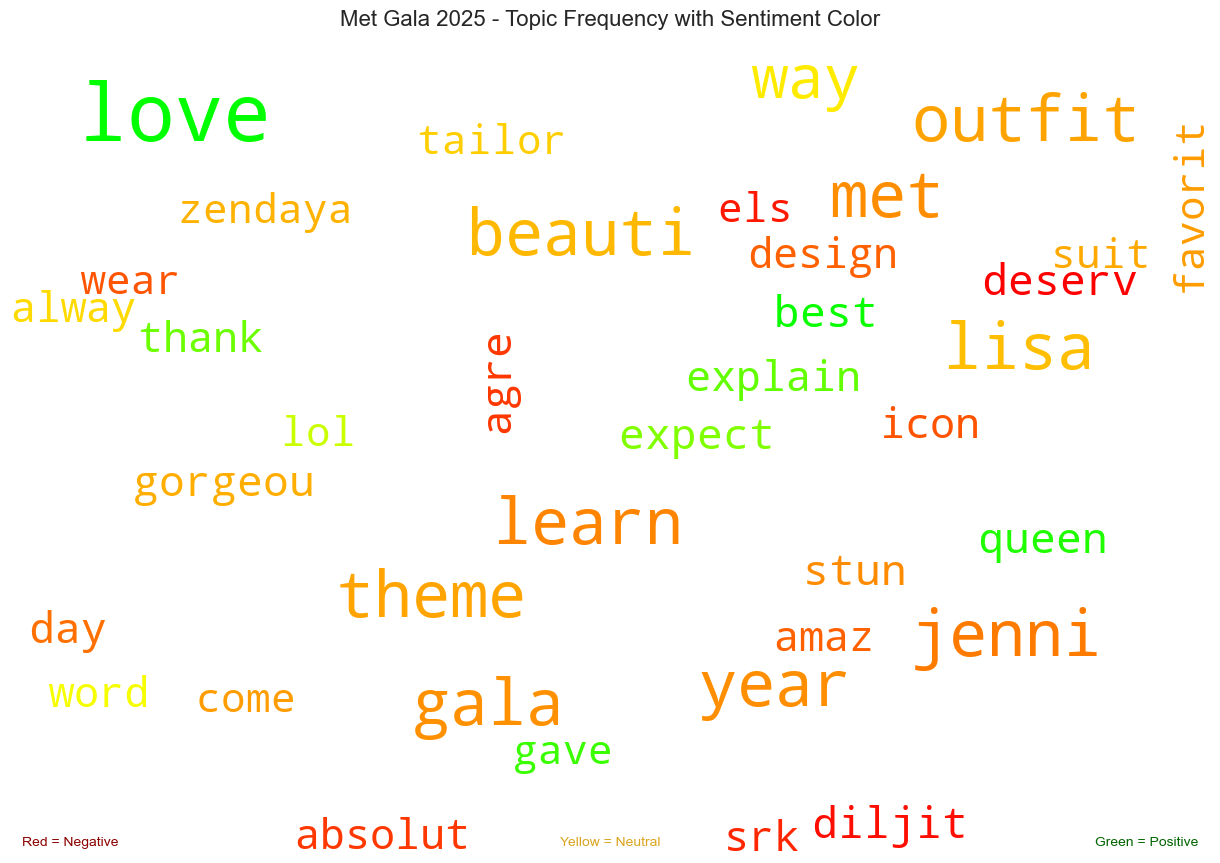

Word cloud saved as 'met_gala_2025_wordcloud.png'

Creating overall word cloud across all years...


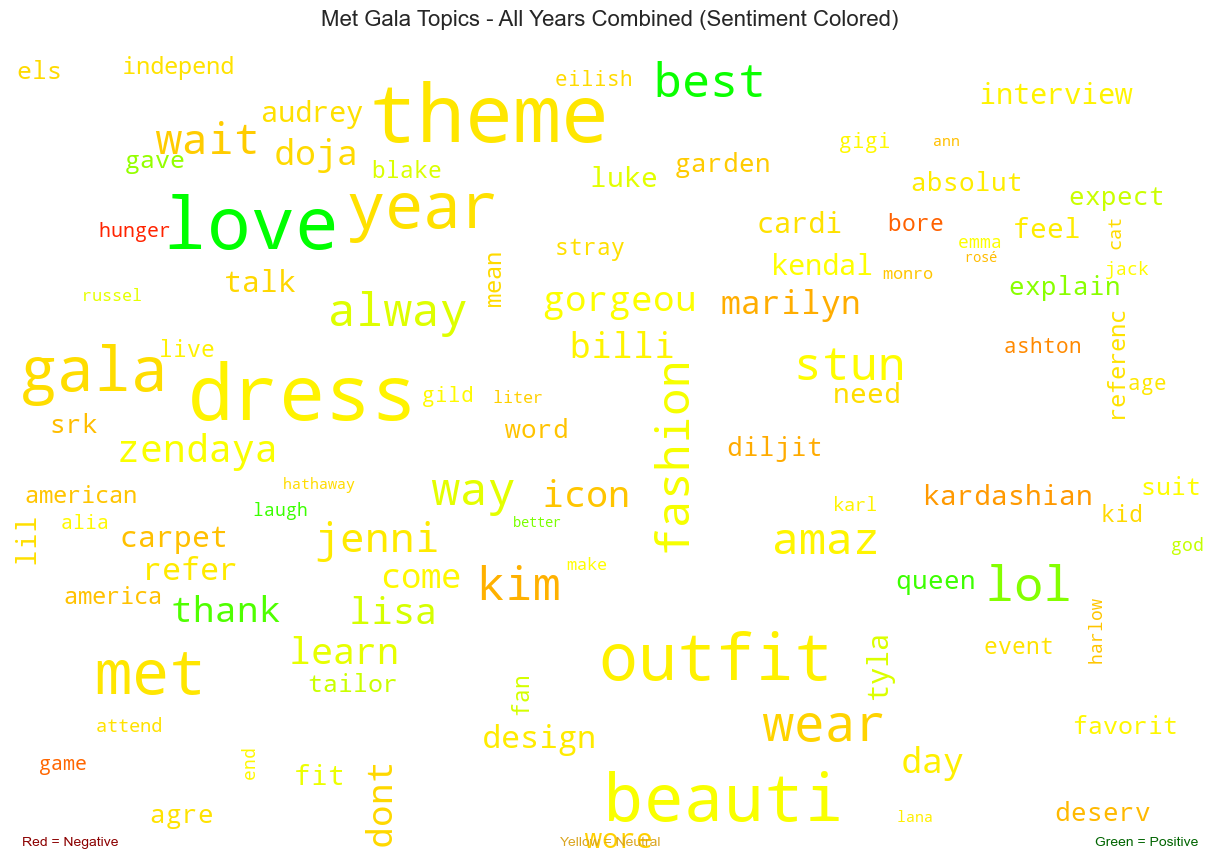

Overall word cloud saved as 'met_gala_all_years_wordcloud.png'

Word cloud generation complete!
Generated 5 individual year word clouds plus 1 overall word cloud


In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Create word clouds for each Met Gala year
for year in sorted(yearly_results.keys()):
    print(f"Creating word cloud for Met Gala {year}...")
    
    # Get topic counts for this year
    topic_counts = Counter(yearly_results[year]['topic_counts'])
    
    # Get top topics
    top_topics = topic_counts.most_common(150)
    wordcloud_topics = {}
    
    # Your topic data using frequency for size
    for topic, count in top_topics:
        wordcloud_topics[topic] = count
    
    # Skip if no topics found
    if not wordcloud_topics:
        print(f"No topics found for {year}, skipping...")
        continue
    
    # Get sentiment values for coloring (if available)
    if 'sentiment' in youtube_df.columns:
        year_df = yearly_results[year]['dataframe']
        
        # Calculate average sentiment for each topic word
        sentiment_dict = {}
        for topic in wordcloud_topics.keys():
            # Find comments containing this topic word
            topic_comments = year_df[year_df['text'].str.contains(topic, case=False, na=False)]
            if len(topic_comments) > 0:
                sentiment_dict[topic] = topic_comments['sentiment'].mean()
            else:
                sentiment_dict[topic] = 0
        
        min_sentiment = min(sentiment_dict.values()) if sentiment_dict else -1
        max_sentiment = max(sentiment_dict.values()) if sentiment_dict else 1
        
        # Color function based on sentiment - red to yellow to green
        def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
            sentiment = sentiment_dict.get(word, 0)
            # Normalize sentiment to [0,1]
            normalized = (sentiment - min_sentiment) / (max_sentiment - min_sentiment) if max_sentiment > min_sentiment else 0.5
            
            # Convert to a color (red to yellow to green)
            if normalized < 0.5:
                # Red to yellow (bad to neutral)
                return f"rgb(255, {int(255 * normalized * 2)}, 0)"
            else:
                # Yellow to green (neutral to good)
                return f"rgb({int(255 * (1 - (normalized - 0.5) * 2))}, 255, 0)"
    else:
        # Use default colormap if no sentiment data
        color_func = None
    
    # Create a WordCloud object
    wordcloud = WordCloud(
        width=1200,
        height=800,
        background_color='white',
        color_func=color_func,  # Custom color function based on sentiment
        prefer_horizontal=0.9,
        max_words=100,
        relative_scaling=0.6,
        min_font_size=8,
        max_font_size=80,
        random_state=42
    ).generate_from_frequencies(wordcloud_topics)
    
    # Create a figure for the word cloud
    plt.figure(figsize=(12, 8), facecolor='white')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    
    # Add title
    title = f"Met Gala {year} - Topic Frequency"
    if 'sentiment' in youtube_df.columns:
        title += " with Sentiment Color"
    plt.title(title, fontsize=16, pad=20)
    
    # Add color legend if using sentiment
    if 'sentiment' in youtube_df.columns and color_func:
        ax = plt.gca()
        ax.text(0.01, 0.01, "Red = Negative", transform=ax.transAxes, 
                fontsize=10, color='darkred', ha='left')
        ax.text(0.5, 0.01, "Yellow = Neutral", transform=ax.transAxes, 
                fontsize=10, color='goldenrod', ha='center')
        ax.text(0.99, 0.01, "Green = Positive", transform=ax.transAxes, 
                fontsize=10, color='darkgreen', ha='right')
    
    # Save the word cloud
    filename = f"met_gala_{year}_wordcloud.png"
    wordcloud.to_file(filename)
    plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    print(f"Word cloud saved as '{filename}'")

# Create overall word cloud across all years
print("\nCreating overall word cloud across all years...")

# Combine all topic counts across years
all_topic_counts = Counter()
for year in yearly_results.keys():
    year_counts = yearly_results[year]['topic_counts']
    for topic, count in year_counts.items():
        all_topic_counts[topic] += count

# Get top topics overall
top_topics_overall = all_topic_counts.most_common(150)
wordcloud_topics_overall = {}

for topic, count in top_topics_overall:
    wordcloud_topics_overall[topic] = count

# Calculate overall sentiment if available
if 'sentiment' in youtube_df.columns:
    sentiment_dict_overall = {}
    for topic in wordcloud_topics_overall.keys():
        # Find all comments containing this topic word
        topic_comments = youtube_df[youtube_df['text'].str.contains(topic, case=False, na=False)]
        if len(topic_comments) > 0:
            sentiment_dict_overall[topic] = topic_comments['sentiment'].mean()
        else:
            sentiment_dict_overall[topic] = 0
    
    min_sentiment_overall = min(sentiment_dict_overall.values())
    max_sentiment_overall = max(sentiment_dict_overall.values())
    
    # Color function for overall analysis
    def color_func_overall(word, font_size, position, orientation, random_state=None, **kwargs):
        sentiment = sentiment_dict_overall.get(word, 0)
        normalized = (sentiment - min_sentiment_overall) / (max_sentiment_overall - min_sentiment_overall) if max_sentiment_overall > min_sentiment_overall else 0.5
        
        if normalized < 0.5:
            return f"rgb(255, {int(255 * normalized * 2)}, 0)"
        else:
            return f"rgb({int(255 * (1 - (normalized - 0.5) * 2))}, 255, 0)"
else:
    color_func_overall = None

# Create overall WordCloud
wordcloud_overall = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    color_func=color_func_overall,
    prefer_horizontal=0.9,
    max_words=100,
    relative_scaling=0.6,
    min_font_size=8,
    max_font_size=80,
    random_state=42
).generate_from_frequencies(wordcloud_topics_overall)

# Display overall word cloud
plt.figure(figsize=(12, 8), facecolor='white')
plt.imshow(wordcloud_overall, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

title_overall = "Met Gala Topics - All Years Combined"
if 'sentiment' in youtube_df.columns:
    title_overall += " (Sentiment Colored)"
plt.title(title_overall, fontsize=16, pad=20)

# Add legend for overall
if 'sentiment' in youtube_df.columns and color_func_overall:
    ax = plt.gca()
    ax.text(0.01, 0.01, "Red = Negative", transform=ax.transAxes, 
            fontsize=10, color='darkred', ha='left')
    ax.text(0.5, 0.01, "Yellow = Neutral", transform=ax.transAxes, 
            fontsize=10, color='goldenrod', ha='center')
    ax.text(0.99, 0.01, "Green = Positive", transform=ax.transAxes, 
            fontsize=10, color='darkgreen', ha='right')

# Save overall word cloud
filename_overall = "met_gala_all_years_wordcloud.png"
wordcloud_overall.to_file(filename_overall)
plt.savefig(filename_overall, dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
print(f"Overall word cloud saved as '{filename_overall}'")

print(f"\nWord cloud generation complete!")
print(f"Generated {len(yearly_results)} individual year word clouds plus 1 overall word cloud")